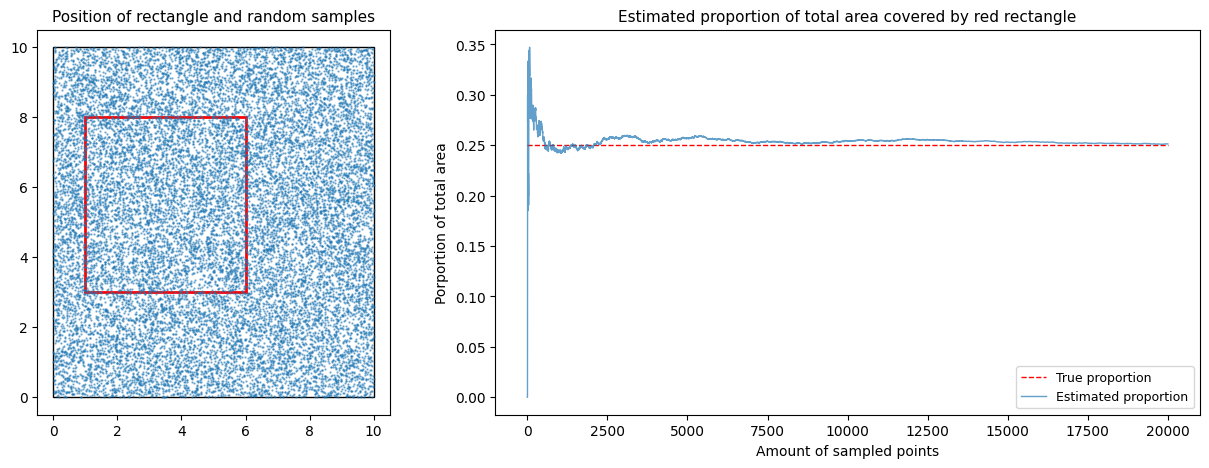

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Define the larger and smaller rectangles
large_rectangle = [10, 10]  # Width and height
small_rectangle = [5, 5]  # Width and height
n_points = 20000 # Number of points to sample

# Initialize arrays to hold x and y coordinates of points
x_points = np.zeros(n_points)
y_points = np.zeros(n_points)

# Initialize a counter for points within the smaller rectangle
inside_count = 0
total_count = 0

# Initialize array to hold estimated areas over time
estimated_areas = np.zeros(n_points)

# Generate points
for i in range(n_points):
    x = np.random.uniform(0, large_rectangle[0])
    y = np.random.uniform(0, large_rectangle[1])
    
    x_points[i] = x
    y_points[i] = y
    
    # Check if point is inside the smaller rectangle
    if 1 <= x <= 1+small_rectangle[0] and 3 <= y <= 3+small_rectangle[1]:
        inside_count += 1

    total_count += 1
    
    # Estimate area
    # estimated_area = (inside_count / (i+1)) * (large_rectangle[0]*large_rectangle[1])
    estimated_areas[i] = (inside_count/total_count)

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios':[1,2]})

# Plot points and rectangles
# ax[0].scatter(x_points, y_points, s=1)
ax[0].add_patch(plt.Rectangle((1, 3), small_rectangle[0], small_rectangle[1], fill=None, color='r', linewidth=2))
ax[0].add_patch(plt.Rectangle((0, 0), large_rectangle[0], large_rectangle[1], fill=None))
ax[0].scatter(x_points, y_points, s=0.5, alpha=0.5)
ax[0].set_title('Position of rectangle and random samples', fontsize=11)

# Plot estimated area over time
ax[1].hlines(y=0.25, xmin=0, xmax=n_points, color='r', linestyle='--', linewidth=1, label='True proportion')
ax[1].plot(estimated_areas, label='Estimated proportion', linewidth=1, alpha=0.7)
ax[1].set_title('Estimated proportion of total area covered by red rectangle', fontsize=11)
ax[1].set_xlabel('Amount of sampled points')
ax[1].set_ylabel('Porportion of total area')
ax[1].legend(loc ="lower right", fontsize="9")

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_35411/383420236.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax[0].plot(np.cos(theta), np.sin(theta), 'r', label='Unit Circle', color='black', linewidth=1.5)


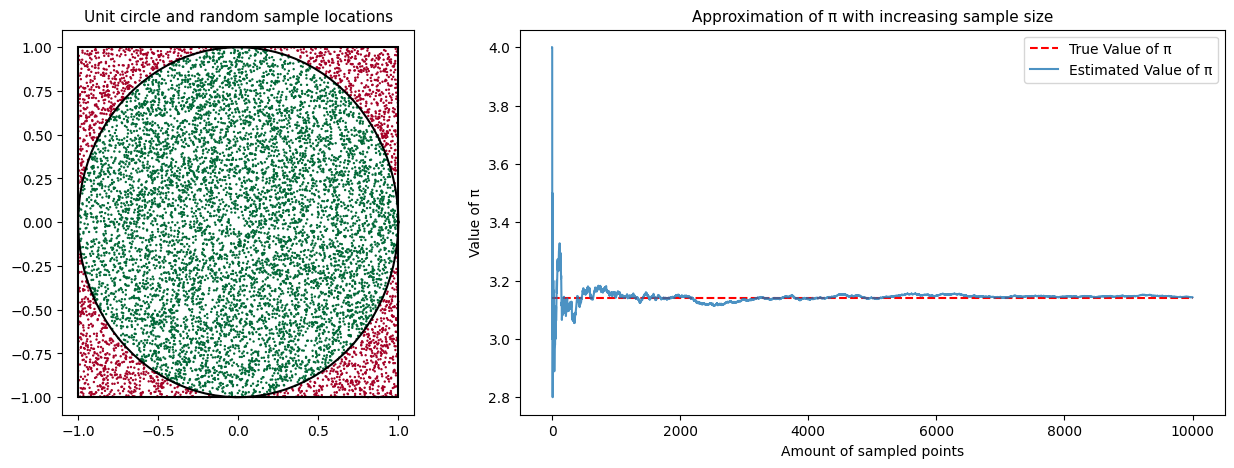

In [60]:
import numpy as np
import matplotlib.pyplot as plt

n_points = 10000  # Number of points to sample

# Initialize arrays to hold x and y coordinates of points
x_points = np.random.uniform(-1, 1, n_points)
y_points = np.random.uniform(-1, 1, n_points)

# Calculate the distance from the origin for each point
distances = np.sqrt(x_points**2 + y_points**2)

# Check if the point falls within the unit circle
inside_circle = distances <= 1

# Calculate the estimated value of pi
estimated_pi = 4 * np.sum(inside_circle) / n_points

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios':[1,2]})

# Visualization
ax[0].scatter(x_points, y_points, c=inside_circle, cmap='RdYlGn', s=0.5)
theta = np.linspace(0, 2*np.pi, 100)
ax[0].plot(np.cos(theta), np.sin(theta), 'r', label='Unit Circle', color='black', linewidth=1.5)
ax[0].add_patch(plt.Rectangle((-1, -1), 2, 2, fill=None, color='black', linewidth=1.5))
ax[0].set_title('Unit circle and random sample locations', fontsize=11)

# Visualization 2: Estimate of pi over time
estimated_pis = 4 * np.cumsum(inside_circle) / np.arange(1, n_points + 1)

# ax[1].figure(figsize=(8, 5))
ax[1].hlines(np.pi, 0, n_points, colors='r', linestyles='--', label='True Value of π')
ax[1].plot(estimated_pis, alpha=0.8, linewidth=1.5, label='Estimated Value of π')
ax[1].set_title('Approximation of π with increasing sample size', fontsize=11)
ax[1].set_xlabel('Amount of sampled points')
ax[1].set_ylabel('Value of π')
ax[1].legend(loc='upper right')